<a href="https://colab.research.google.com/github/eoinleen/Biophysics-general/blob/main/TRIC_assay_anaylsis_and_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔬 TRIC Multi-Column Binding Analysis Tool
📋 Usage Examples:

1️⃣ Analyze first pair only:
   filename = setup_analysis()[0]
   data, results = analyze_uploaded_file_multi(filename)

2️⃣ Fit pairs 0,1 and plot pair 2 as scatter:
   data, results = analyze_uploaded_file_multi(filename, pairs_to_fit=[0,1], pairs_to_plot=[2])

3️⃣ Auto-start (fit first pair, plot others):


Saving test4.xlsx to test4 (14).xlsx
✅ File 'test4 (14).xlsx' uploaded successfully!
📊 File structure preview:
   Rows: 32
   Columns: [10.0, 933.6614518270059, 20.0, 916.9]

📋 First few rows:
   10.000000   933.661452  20.000000   916.900000
0     5.00000  938.837222        20.0       921.4
1     3.66625  933.108332        10.0       906.2
2     2.50000  934.939620         5.0       907.4
3     2.50000  936.735555         5.0       907.8
4     2.50000  933.388253         2.5       899.5

🔍 Found 2 column pairs:
   Pair 0: 10.0 (conc µM) & 933.6614518270059 (fluorescence)
   Pair 1: 20.0 (conc µM) & 916.9 (fluorescence)

⚙️ Analysis plan:
   Pairs to fit: [0]
   Pairs to plot as scatter: [1]

📈 Pair 0 data summary:
   Data points: 32
   Concentration range: 0.004 - 5.000 µM
   Fluorescence range: 894.493 - 938.837

📈 Pair 1 data summary:
   Data points: 28
   Concentration range: 0.005 - 20.000 µM
   Fluorescence range: 893.000 - 921.400

🔄 Fitting 1 pairs...

--- Analyzing Pair 0 ---


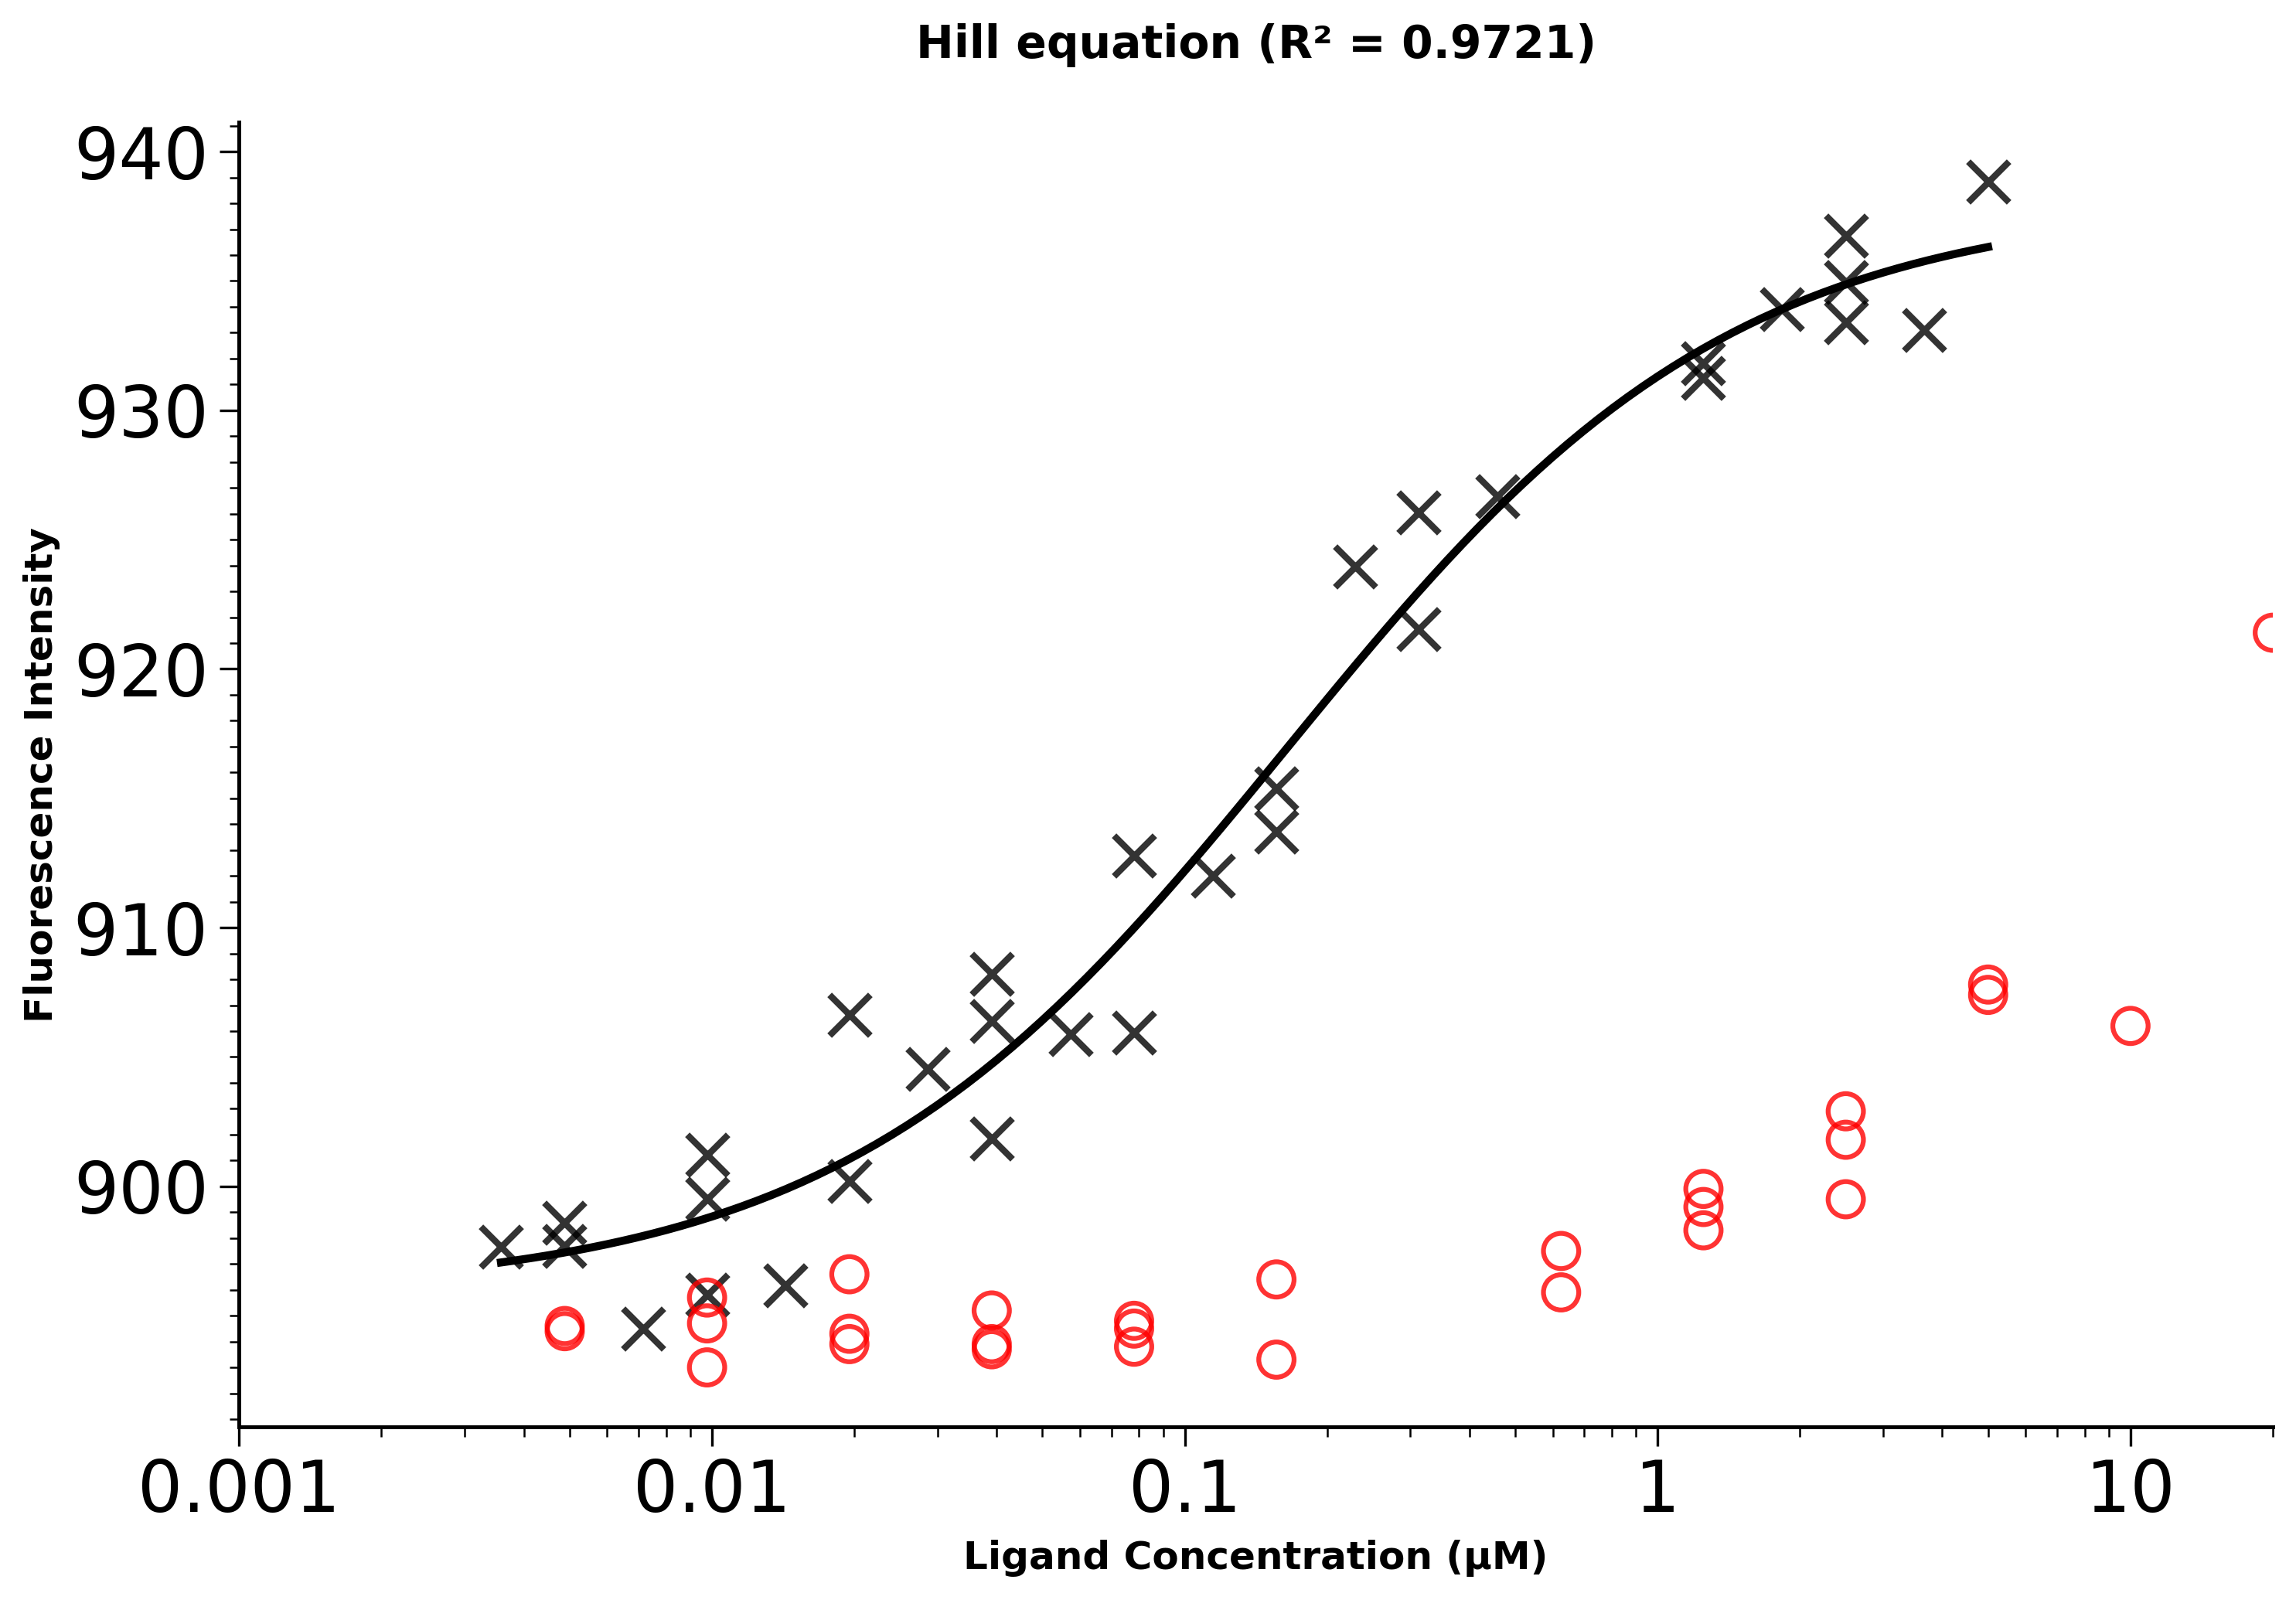


📊 Hill equation:
   Equation: Y = Ymin + (Ymax-Ymin)/(1+(X/Kd)^n)
   R²: 0.9721
   Kd: 1.648e-07 M (0.165 µM)
   Standard Error: ± 2.767e-08 M (± 0.028 µM)
   90% CI: 1.193e-07 - 2.103e-07 M
           (0.119 - 0.210 µM)
   95% CI: 1.105e-07 - 2.190e-07 M
           (0.111 - 0.219 µM)
   pKd: 6.78 (90% CI: 6.68 - 6.92)
   Relative error: 16.8%
--------------------------------------------------
✅ Saved: TRIC_binding_Simple_binding_pair0.png
✅ Saved: TRIC_binding_Simple_binding_pair0.pdf


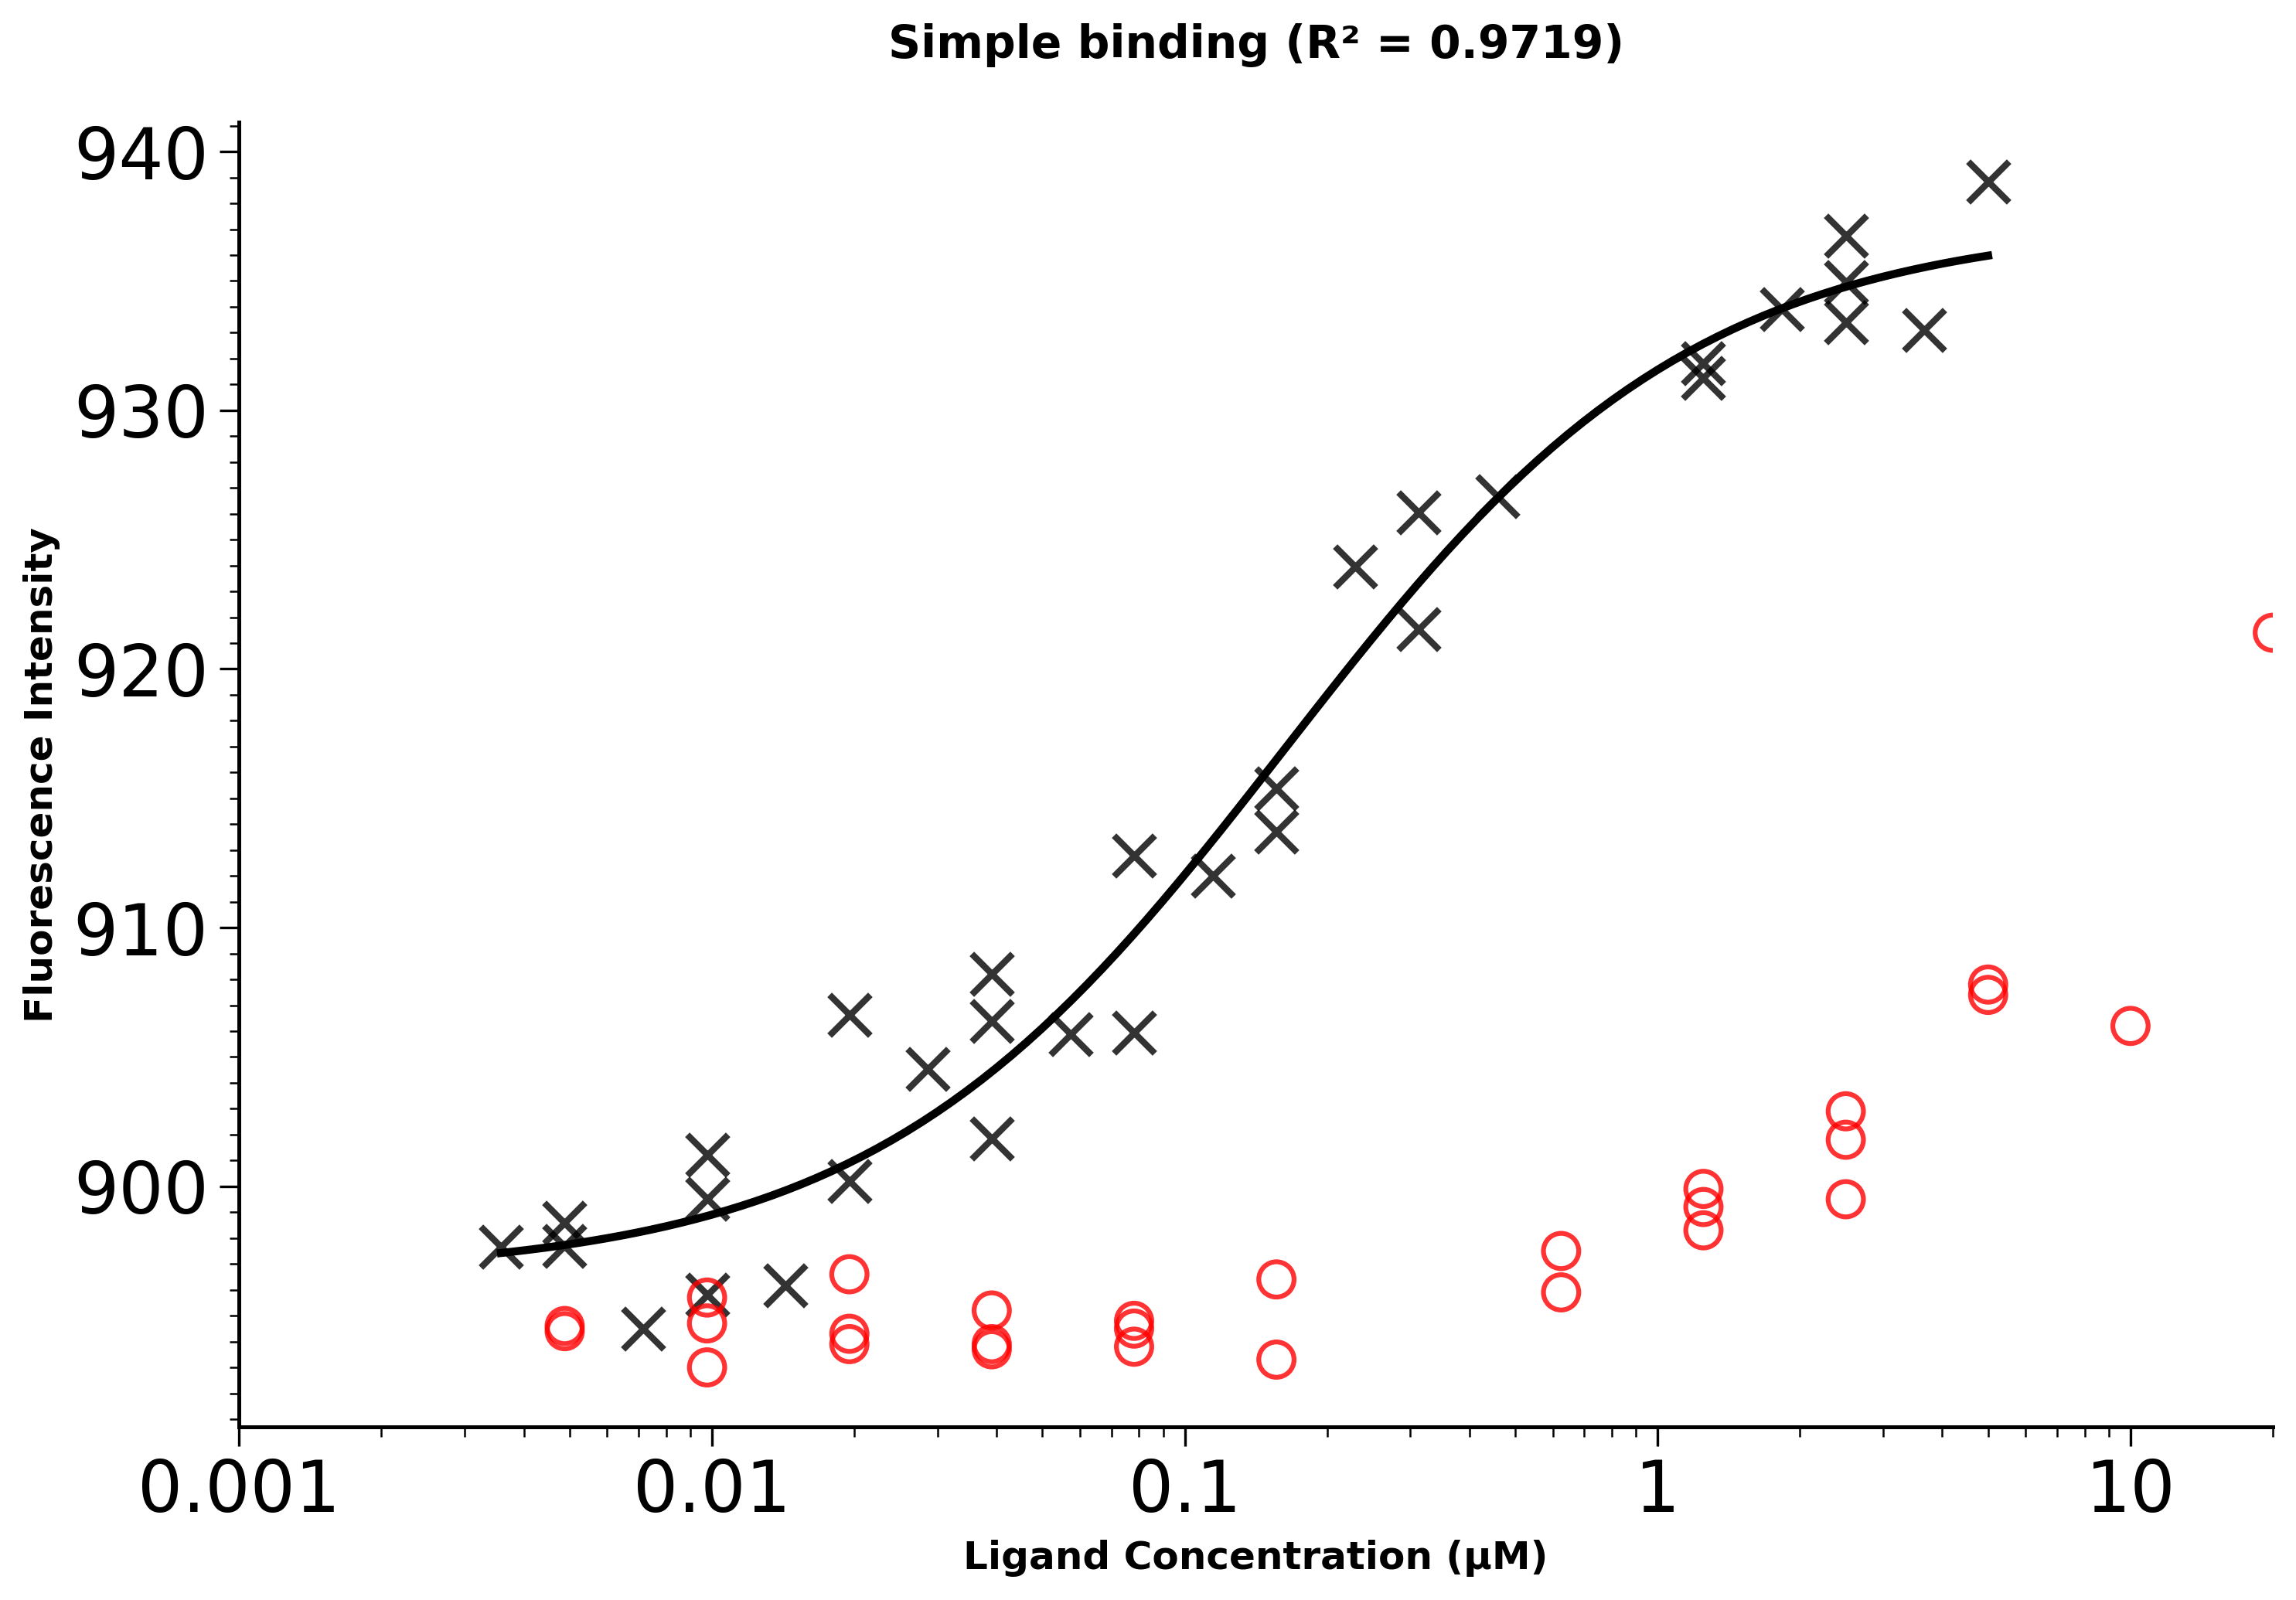


📊 Simple binding:
   Equation: Y = Ymin + (Ymax-Ymin)/(1+X/Kd)
   R²: 0.9719
   Kd: 1.626e-07 M (0.163 µM)
   Standard Error: ± 2.400e-08 M (± 0.024 µM)
   90% CI: 1.231e-07 - 2.021e-07 M
           (0.123 - 0.202 µM)
   95% CI: 1.156e-07 - 2.097e-07 M
           (0.116 - 0.210 µM)
   pKd: 6.79 (90% CI: 6.69 - 6.91)
   Relative error: 14.8%
--------------------------------------------------

💾 All model plots saved. Check your Colab files panel on the left.
If files didn't save automatically, you can manually download figures
by right-clicking on each plot and selecting 'Save image as...'

📊 ANALYSIS RESULTS

🔬 Pair 0 (Hill equation):
   Kd: 1.648e-07 M (0.165 µM)
   Standard Error: ± 2.767e-08 M (± 0.028 µM)
   90% CI: 1.193e-07 - 2.103e-07 M
           (0.119 - 0.210 µM)
   95% CI: 1.105e-07 - 2.190e-07 M
           (0.111 - 0.219 µM)
   R²: 0.9721
   Hill coefficient: 0.92
   pKd: 6.78 (90% CI: 6.68 - 6.92)
   Relative error: 16.8%


In [29]:
"""
TRIC Ligand Binding Assay Analysis Script
=========================================

Author: Claude (Anthropic)
Version: 2.0
Date: 2025

OVERVIEW:
This script analyzes TRIC (Temperature-Related Intensity Change) binding assay data
to determine ligand-protein binding affinities. TRIC measures ligand-induced thermal
stabilization of proteins by monitoring fluorescence changes upon heating.

INPUT DATA FORMAT:
- Excel files with paired columns: (A,B), (C,D), (E,F), etc.
- Column pattern: Concentration (µM), Fnorm values
- Fnorm = F1/F0 (fluorescence ratio: heated state / cold state)

BINDING MODELS TESTED:
================================================================================

1. ONE SITE BINDING (Prism Standard):
   Y = Bmax × X/(Kd + X) + Background

   Where:
   - Y = Fnorm (normalized fluorescence)
   - X = ligand concentration (M)
   - Bmax = maximum specific binding
   - Kd = dissociation constant (M)
   - Background = non-specific background signal

2. ONE SITE BINDING WITH NON-SPECIFIC COMPONENT:
   Y = Bmax × X/(Kd + X) + NS × X + Background

   Additional parameter:
   - NS = non-specific binding slope (linear component)

3. HILL EQUATION (Cooperative Binding):
   Y = Ymin + (Ymax - Ymin) / (1 + (X/Kd)^n)

   Where:
   - Ymin = minimum response (fully bound)
   - Ymax = maximum response (unbound)
   - n = Hill coefficient (cooperativity parameter)
   - n > 1: positive cooperativity
   - n < 1: negative cooperativity
   - n = 1: no cooperativity (simple binding)

4. SIMPLE BINDING (Hill coefficient = 1):
   Y = Ymin + (Ymax - Ymin) / (1 + X/Kd)

   Equivalent to Hill equation with n fixed at 1.0

FITTING ALGORITHM:
================================================================================

Method: Levenberg-Marquardt non-linear least squares optimization
Implementation: SciPy curve_fit function
Maximum iterations: 5000 function evaluations

Algorithm Details:
- Hybrid approach combining gradient descent and Gauss-Newton methods
- Minimizes sum of squared residuals: Σ(yi - f(xi))²
- Calculates Jacobian matrix (partial derivatives) for parameter updates
- Switches between methods based on convergence behavior
- Provides covariance matrix for parameter uncertainty estimation

Initial Parameter Estimation:
- Ymax/Bmax: maximum observed response
- Ymin/Background: minimum observed response
- Kd: concentration at half-maximal response
- Hill coefficient: 1.0 (starting guess)
- Non-specific slope: 0.01 (small starting value)

Parameter Bounds:
- All parameters ≥ 0 (except NS which can be negative)
- Hill coefficient: 0.1 to 5.0
- Kd: ≥ 1e-12 M (prevents division by zero)

MODEL SELECTION:
================================================================================

Criteria: Coefficient of determination (R²)
R² = 1 - (SS_res / SS_tot)

Where:
- SS_res = Σ(yi - ŷi)² (residual sum of squares)
- SS_tot = Σ(yi - ȳ)² (total sum of squares)
- ŷi = fitted values, ȳ = mean of observed values

Selection Process:
1. Fit all four binding models to data
2. Calculate R² for each model
3. Select model with highest R²
4. Display comparison of all models

UNCERTAINTY ANALYSIS:
================================================================================

Standard Errors:
Derived from diagonal elements of covariance matrix (C):
SE(pi) = √(Cii)

Where covariance matrix C = σ² × (J^T × J)^(-1)
- σ² = residual variance from fit
- J = Jacobian matrix (parameter sensitivities)
- Accounts for parameter correlations and fitting uncertainty

Confidence Intervals:
Assuming normal distribution of parameter estimates:

90% CI: Kd ± 1.645 × SE(Kd)
95% CI: Kd ± 1.96 × SE(Kd)

For pKd (logarithmic scale):
pKd = -log10(Kd)
pKd_CI_lower = -log10(Kd_CI_upper)
pKd_CI_upper = -log10(Kd_CI_lower)

Relative Error:
Relative error (%) = (SE(Kd) / Kd) × 100

Quality Indicators:
- R² > 0.95: Excellent fit
- Relative error < 10%: High precision
- Relative error 10-20%: Good precision
- Relative error > 20%: Consider more data points

VISUALIZATION:
================================================================================

Features:
- Log-scale x-axis with decimal notation (0.001, 0.01, 0.1, 1, 10)
- Concentration range: 0.001 to 25 µM
- High-resolution output (300 DPI)
- Transparent background for publication
- Helvetica font family
- Minor tick marks on y-axis for precise reading

Symbols:
- Fitted data: Black X markers (size 160)
- Scatter data: Red empty circles (size 120)
- Fitted curves: Black lines (width 2.5)

File Outputs:
- PNG: High-resolution raster (300 DPI)
- PDF: Vector format (infinite resolution)
- SVG: Web-compatible vector format

LIMITATIONS:
================================================================================

1. Standard errors reflect fitting uncertainty only, not experimental replicate variability
2. Confidence intervals assume normal distribution of parameter estimates
3. Model selection based on R² only (does not account for parameter count)
4. No correction for multiple comparisons when testing multiple models
5. Assumes independent, identically distributed residuals

INTERPRETATION:
================================================================================

Kd Values:
- Represents ligand concentration at 50% binding
- Lower Kd = higher affinity
- Typical ranges:
  - nM: Very high affinity (drugs, natural substrates)
  - µM: Moderate affinity (many protein-ligand interactions)
  - mM: Low affinity (weak interactions)

Hill Coefficients:
- n = 1: Simple binding, no cooperativity
- n > 1: Positive cooperativity (binding enhances further binding)
- n < 1: Negative cooperativity (binding inhibits further binding)

Non-specific Binding:
- Positive slope: Non-specific association increases with concentration
- Should be much smaller than specific binding component
- Large NS values may indicate aggregation or non-specific effects

REFERENCES:
================================================================================

1. Levenberg-Marquardt Algorithm: Marquardt, D.W. (1963). J. Soc. Ind. Appl. Math.
2. Hill Equation: Hill, A.V. (1910). J. Physiol.
3. TRIC Method: Groftehauge et al. (2015). Acta Crystallogr. D Biol. Crystallogr.
4. Statistical Methods: Motulsky, H. & Christopoulos, A. (2004). Fitting Models to Biological Data

================================================================================
"""


# TRIC Ligand Binding Assay Analysis Script for Google Colab
# Multi-column analysis: (A,B), (C,D), (E,F), etc.
# Column pattern: Concentration (µM), Fluorescence

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import seaborn as sns
from google.colab import files

# Set minimalist plotting style
plt.rcParams.update({
    'axes.linewidth': 1.2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    'axes.grid': False,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white'
})

def analyze_uploaded_file_multi(filename, pairs_to_fit=None, pairs_to_plot=None):
    """
    Load and analyze multiple column pairs from Excel file

    Parameters:
    filename: Excel file name
    pairs_to_fit: list of pair indices to fit (e.g., [0, 1] for pairs A-B and C-D)
    pairs_to_plot: list of pair indices to plot as scatter only (e.g., [2] for pair E-F)
    """
    try:
        # Read Excel file
        df = pd.read_excel(filename, engine='openpyxl')

        print(f"📊 File structure preview:")
        print(f"   Rows: {len(df)}")
        print(f"   Columns: {list(df.columns)}")
        print("\n📋 First few rows:")
        print(df.head())

        # Determine number of column pairs
        n_cols = df.shape[1]
        n_pairs = n_cols // 2

        print(f"\n🔍 Found {n_pairs} column pairs:")
        for i in range(n_pairs):
            col_names = df.columns[i*2:(i+1)*2].tolist()
            print(f"   Pair {i}: {col_names[0]} (conc µM) & {col_names[1]} (fluorescence)")

        # Set defaults if not specified
        if pairs_to_fit is None and pairs_to_plot is None:
            pairs_to_fit = [0]  # Default: fit first pair only
            pairs_to_plot = list(range(1, n_pairs))  # Plot others as scatter
        elif pairs_to_fit is None:
            pairs_to_fit = []
        elif pairs_to_plot is None:
            pairs_to_plot = []

        print(f"\n⚙️ Analysis plan:")
        print(f"   Pairs to fit: {pairs_to_fit}")
        print(f"   Pairs to plot as scatter: {pairs_to_plot}")

        # Extract and analyze data
        all_data = {}
        fit_results = {}

        for pair_idx in range(n_pairs):
            conc_col = pair_idx * 2
            fluor_col = pair_idx * 2 + 1

            concentrations_um = df.iloc[:, conc_col].dropna().values
            fluorescence = df.iloc[:, fluor_col].dropna().values

            # Match lengths
            min_len = min(len(concentrations_um), len(fluorescence))
            concentrations_um = concentrations_um[:min_len]
            fluorescence = fluorescence[:min_len]

            # Convert to M
            concentrations_m = concentrations_um * 1e-6

            all_data[pair_idx] = {
                'conc_um': concentrations_um,
                'conc_m': concentrations_m,
                'fluorescence': fluorescence,
                'name': f"Pair {pair_idx}"
            }

            print(f"\n📈 Pair {pair_idx} data summary:")
            print(f"   Data points: {len(concentrations_m)}")
            print(f"   Concentration range: {np.min(concentrations_um):.3f} - {np.max(concentrations_um):.3f} µM")
            print(f"   Fluorescence range: {np.min(fluorescence):.3f} - {np.max(fluorescence):.3f}")

        # Fit specified pairs
        if pairs_to_fit:
            print(f"\n🔄 Fitting {len(pairs_to_fit)} pairs...")
            for pair_idx in pairs_to_fit:
                if pair_idx < n_pairs:
                    print(f"\n--- Analyzing Pair {pair_idx} ---")
                    result = analyze_binding_data(all_data[pair_idx]['conc_m'],
                                                all_data[pair_idx]['fluorescence'])
                    if result:
                        fit_results[pair_idx] = result
                        kd_um = result['parameters'][2] * 1e6
                        print(f"✅ Pair {pair_idx} - Kd: {kd_um:.3f} µM, R²: {result['r2']:.3f}")

                        # Immediately show confidence intervals
                        kd_m = result['parameters'][2]
                        kd_error_m = result['param_errors'][2]
                        kd_error_um = kd_error_m * 1e6

                        # Calculate confidence intervals
                        ci_90_lower_m = kd_m - 1.645 * kd_error_m
                        ci_90_upper_m = kd_m + 1.645 * kd_error_m
                        ci_90_lower_um = ci_90_lower_m * 1e6
                        ci_90_upper_um = ci_90_upper_m * 1e6

                        ci_95_lower_m = kd_m - 1.96 * kd_error_m
                        ci_95_upper_m = kd_m + 1.96 * kd_error_m
                        ci_95_lower_um = ci_95_lower_m * 1e6
                        ci_95_upper_um = ci_95_upper_m * 1e6

                        print(f"   Standard Error: ± {kd_error_m:.3e} M (± {kd_error_um:.3f} µM)")
                        print(f"   90% CI: {ci_90_lower_m:.3e} - {ci_90_upper_m:.3e} M")
                        print(f"           ({ci_90_lower_um:.3f} - {ci_90_upper_um:.3f} µM)")
                        print(f"   95% CI: {ci_95_lower_m:.3e} - {ci_95_upper_m:.3e} M")
                        print(f"           ({ci_95_lower_um:.3f} - {ci_95_upper_um:.3f} µM)")

                        # pKd with confidence intervals
                        pkd = -np.log10(kd_m)
                        pkd_ci_90_lower = -np.log10(ci_90_upper_m)
                        pkd_ci_90_upper = -np.log10(ci_90_lower_m)
                        print(f"   pKd: {pkd:.2f} (90% CI: {pkd_ci_90_lower:.2f} - {pkd_ci_90_upper:.2f})")

                        # Calculate relative error as percentage
                        relative_error = (kd_error_m / kd_m) * 100
                        print(f"   Relative error: {relative_error:.1f}%")

        # Create combined plot
        plot_multi_results(all_data, fit_results, pairs_to_fit, pairs_to_plot)

        return all_data, fit_results

    except Exception as e:
        print(f"❌ Error loading file '{filename}': {e}")
        return None, None

def hill_equation(x, fmin, fmax, kd, hill_coeff):
    """Hill equation for ligand binding"""
    return fmin + (fmax - fmin) / (1 + (x / kd) ** hill_coeff)

def analyze_binding_data(concentrations, fluorescence):
    """Fit binding data and return best model"""
    # Sort data
    sort_idx = np.argsort(concentrations)
    conc_sorted = concentrations[sort_idx]
    fluor_sorted = fluorescence[sort_idx]

    # Initial estimates
    fmax_est = np.max(fluor_sorted)
    fmin_est = np.min(fluor_sorted)
    bmax_est = fmax_est - fmin_est
    background_est = fmin_est

    half_max = (fmax_est + fmin_est) / 2
    kd_idx = np.argmin(np.abs(fluor_sorted - half_max))
    kd_est = conc_sorted[kd_idx]

    models_to_test = []

    try:
        # Model 1: One site binding (Prism style)
        initial_guess_1 = [bmax_est, kd_est, background_est]
        try:
            popt_1, pcov_1 = curve_fit(one_site_binding, conc_sorted, fluor_sorted,
                                     p0=initial_guess_1, maxfev=5000,
                                     bounds=([0, 1e-12, 0], [np.inf, np.inf, np.inf]))
            fitted_1 = one_site_binding(conc_sorted, *popt_1)
            r2_1 = r2_score(fluor_sorted, fitted_1)
            models_to_test.append({
                'name': 'One site binding',
                'equation': 'Y = Bmax*X/(Kd + X) + Background',
                'params': popt_1,
                'param_names': ['Bmax', 'Kd (M)', 'Background'],
                'pcov': pcov_1,
                'r2': r2_1,
                'fitted': fitted_1,
                'function': one_site_binding
            })
        except:
            pass

        # Model 2: One site binding with non-specific
        initial_guess_2 = [bmax_est, kd_est, 0.01, background_est]
        try:
            popt_2, pcov_2 = curve_fit(one_site_binding_ns, conc_sorted, fluor_sorted,
                                     p0=initial_guess_2, maxfev=5000,
                                     bounds=([0, 1e-12, -np.inf, 0], [np.inf, np.inf, np.inf, np.inf]))
            fitted_2 = one_site_binding_ns(conc_sorted, *popt_2)
            r2_2 = r2_score(fluor_sorted, fitted_2)
            models_to_test.append({
                'name': 'One site + non-specific',
                'equation': 'Y = Bmax*X/(Kd+X) + NS*X + Background',
                'params': popt_2,
                'param_names': ['Bmax', 'Kd (M)', 'Non-specific', 'Background'],
                'pcov': pcov_2,
                'r2': r2_2,
                'fitted': fitted_2,
                'function': one_site_binding_ns
            })
        except:
            pass

        # Model 3: Hill equation (original)
        initial_guess_3 = [fmin_est, fmax_est, kd_est, 1.0]
        try:
            popt_3, pcov_3 = curve_fit(hill_equation, conc_sorted, fluor_sorted,
                                     p0=initial_guess_3, maxfev=5000,
                                     bounds=([0, 0, 1e-12, 0.1], [np.inf, np.inf, np.inf, 5.0]))
            fitted_3 = hill_equation(conc_sorted, *popt_3)
            r2_3 = r2_score(fluor_sorted, fitted_3)
            models_to_test.append({
                'name': 'Hill equation',
                'equation': 'Y = Ymin + (Ymax-Ymin)/(1+(X/Kd)^n)',
                'params': popt_3,
                'param_names': ['Y_min', 'Y_max', 'Kd (M)', 'Hill coefficient'],
                'pcov': pcov_3,
                'r2': r2_3,
                'fitted': fitted_3,
                'function': hill_equation
            })
        except:
            pass

        # Model 4: Simple binding (Hill = 1)
        def hill_fixed(x, fmin, fmax, kd):
            return hill_equation(x, fmin, fmax, kd, 1.0)

        initial_guess_4 = [fmin_est, fmax_est, kd_est]
        try:
            popt_4, pcov_4 = curve_fit(hill_fixed, conc_sorted, fluor_sorted,
                                     p0=initial_guess_4, maxfev=5000,
                                     bounds=([0, 0, 1e-12], [np.inf, np.inf, np.inf]))
            popt_4_ext = list(popt_4) + [1.0]
            pcov_4_ext = np.zeros((4, 4))
            pcov_4_ext[:3, :3] = pcov_4
            fitted_4 = hill_equation(conc_sorted, *popt_4_ext)
            r2_4 = r2_score(fluor_sorted, fitted_4)
            models_to_test.append({
                'name': 'Simple binding',
                'equation': 'Y = Ymin + (Ymax-Ymin)/(1+X/Kd)',
                'params': popt_4_ext,
                'param_names': ['Y_min', 'Y_max', 'Kd (M)', 'Hill coefficient'],
                'pcov': pcov_4_ext,
                'r2': r2_4,
                'fitted': fitted_4,
                'function': hill_equation
            })
        except:
            pass

        if not models_to_test:
            print("All fitting attempts failed")
            return None

        # Select best model based on R²
        best_model = max(models_to_test, key=lambda x: x['r2'])

        # Generate smooth curve for plotting
        conc_smooth = np.logspace(np.log10(np.min(conc_sorted)),
                                  np.log10(np.max(conc_sorted)), 100)

        if best_model['name'] == 'One site binding':
            smooth_curve = one_site_binding(conc_smooth, *best_model['params'])
        elif best_model['name'] == 'One site + non-specific':
            smooth_curve = one_site_binding_ns(conc_smooth, *best_model['params'])
        else:
            smooth_curve = hill_equation(conc_smooth, *best_model['params'])

        # Print model comparison
        print(f"\n📊 Model comparison:")
        for model in sorted(models_to_test, key=lambda x: x['r2'], reverse=True):
            print(f"   {model['name']}: R² = {model['r2']:.4f}")
        print(f"   Best model: {best_model['name']}")

        return {
            'parameters': best_model['params'],
            'param_errors': np.sqrt(np.diag(best_model['pcov'])),
            'param_names': best_model['param_names'],
            'r2': best_model['r2'],
            'method': best_model['name'],
            'equation': best_model['equation'],
            'original_conc': conc_sorted,
            'original_fluorescence': fluor_sorted,
            'smooth_conc': conc_smooth,
            'smooth_fluorescence': smooth_curve,
            'all_models': models_to_test
        }

    except Exception as e:
        print(f"Fitting failed: {e}")
        return None

def print_detailed_results(fit_results, pairs_to_fit):
    """Print detailed results with confidence intervals"""
    print("\n" + "="*50)
    print("📊 ANALYSIS RESULTS")
    print("="*50)

    for pair_idx in pairs_to_fit:
        if pair_idx in fit_results:
            result = fit_results[pair_idx]
            kd_um = result['parameters'][2] * 1e6
            kd_m = result['parameters'][2]
            kd_error_m = result['param_errors'][2]
            kd_error_um = kd_error_m * 1e6

            # Calculate confidence intervals (assuming normal distribution)
            # For 90% CI, use 1.645 * standard error
            # For 95% CI, use 1.96 * standard error
            ci_90_lower_m = kd_m - 1.645 * kd_error_m
            ci_90_upper_m = kd_m + 1.645 * kd_error_m
            ci_90_lower_um = ci_90_lower_m * 1e6
            ci_90_upper_um = ci_90_upper_m * 1e6

            ci_95_lower_m = kd_m - 1.96 * kd_error_m
            ci_95_upper_m = kd_m + 1.96 * kd_error_m
            ci_95_lower_um = ci_95_lower_m * 1e6
            ci_95_upper_um = ci_95_upper_m * 1e6

            print(f"\n🔬 Pair {pair_idx} ({result['method']}):")
            print(f"   Kd: {kd_m:.3e} M ({kd_um:.3f} µM)")
            print(f"   Standard Error: ± {kd_error_m:.3e} M (± {kd_error_um:.3f} µM)")
            print(f"   90% CI: {ci_90_lower_m:.3e} - {ci_90_upper_m:.3e} M")
            print(f"           ({ci_90_lower_um:.3f} - {ci_90_upper_um:.3f} µM)")
            print(f"   95% CI: {ci_95_lower_m:.3e} - {ci_95_upper_m:.3e} M")
            print(f"           ({ci_95_lower_um:.3f} - {ci_95_upper_um:.3f} µM)")
            print(f"   R²: {result['r2']:.4f}")
            print(f"   Hill coefficient: {result['parameters'][3]:.2f}")

            # pKd with confidence intervals
            pkd = -np.log10(kd_m)
            pkd_ci_90_lower = -np.log10(ci_90_upper_m)  # Note: reversed for log scale
            pkd_ci_90_upper = -np.log10(ci_90_lower_m)
            print(f"   pKd: {pkd:.2f} (90% CI: {pkd_ci_90_lower:.2f} - {pkd_ci_90_upper:.2f})")

            # Calculate relative error as percentage
            relative_error = (kd_error_m / kd_m) * 100
            print(f"   Relative error: {relative_error:.1f}%")

def plot_all_models(all_data, fit_results, pairs_to_fit, pairs_to_plot):
    """Create separate plots for each binding model"""

    for pair_idx in pairs_to_fit:
        if pair_idx in fit_results and 'all_models' in fit_results[pair_idx]:
            result = fit_results[pair_idx]
            data = all_data[pair_idx]

            # Create four separate plots
            for i, model in enumerate(result['all_models']):
                fig, ax = plt.subplots(1, 1, figsize=(10, 7), dpi=300)
                fig.patch.set_alpha(0)
                ax.patch.set_alpha(0)

                # Plot data points
                ax.scatter(data['conc_um'], data['fluorescence'],
                          alpha=0.8, s=160, color='black',
                          marker='x', linewidths=2, zorder=5)

                # Generate smooth curve for this specific model
                conc_smooth = np.logspace(np.log10(np.min(data['conc_um'])),
                                         np.log10(np.max(data['conc_um'])), 100)
                conc_smooth_m = conc_smooth * 1e-6

                if model['name'] == 'One site binding':
                    smooth_curve = one_site_binding(conc_smooth_m, *model['params'])
                elif model['name'] == 'One site + non-specific':
                    smooth_curve = one_site_binding_ns(conc_smooth_m, *model['params'])
                else:
                    smooth_curve = hill_equation(conc_smooth_m, *model['params'])

                # Plot fitted curve
                ax.plot(conc_smooth, smooth_curve,
                       color='black', linewidth=2.5, zorder=3)

                # Plot scatter-only pairs if any
                for scatter_pair_idx in pairs_to_plot:
                    if scatter_pair_idx in all_data:
                        scatter_data = all_data[scatter_pair_idx]
                        ax.scatter(scatter_data['conc_um'], scatter_data['fluorescence'],
                                  alpha=0.8, s=120, facecolors='none', edgecolors='red',
                                  marker='o', linewidths=1.5, zorder=5)

                # Styling
                ax.set_xscale('log')
                ax.set_xlabel('Ligand Concentration (µM)', fontsize=12, fontweight='bold')
                ax.set_ylabel('Fluorescence Intensity', fontsize=12, fontweight='bold')
                ax.tick_params(labelsize=22, which='major', direction='out', length=6)
                ax.tick_params(which='minor', direction='out', length=3)

                # Add minor ticks on y-axis
                from matplotlib.ticker import AutoMinorLocator
                ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))

                # X-axis formatting
                ax.set_xticks([0.001, 0.01, 0.1, 1, 10])
                ax.set_xlim(0.001, 20)

                from matplotlib.ticker import LogFormatter, FuncFormatter
                def format_func(x, pos):
                    if x >= 1:
                        return f'{x:g}'
                    else:
                        return f'{x:.3f}'.rstrip('0').rstrip('.')
                ax.xaxis.set_major_formatter(FuncFormatter(format_func))

                # Add title with model info
                title = f"{model['name']} (R² = {model['r2']:.4f})"
                ax.set_title(title, fontsize=14, fontweight='bold', pad=20)

                plt.tight_layout()

                # Save each model plot separately
                model_name_clean = model['name'].replace(' ', '_').replace('+', 'plus')
                filename = f'TRIC_binding_{model_name_clean}_pair{pair_idx}'

                try:
                    plt.savefig(f'{filename}.png', dpi=300, bbox_inches='tight',
                               transparent=True, facecolor='none')
                    print(f"✅ Saved: {filename}.png")
                except Exception as e:
                    print(f"⚠️ PNG save failed for {model['name']}: {e}")

                try:
                    plt.savefig(f'{filename}.pdf', bbox_inches='tight',
                               transparent=True, facecolor='none')
                    print(f"✅ Saved: {filename}.pdf")
                except Exception as e:
                    print(f"⚠️ PDF save failed for {model['name']}: {e}")

                plt.show()

                # Print model equation and parameters with confidence intervals
                print(f"\n📊 {model['name']}:")
                print(f"   Equation: {model['equation']}")
                print(f"   R²: {model['r2']:.4f}")

                # Find Kd parameter index and calculate confidence intervals
                kd_idx = None
                for j, param_name in enumerate(model['param_names']):
                    if 'Kd' in param_name:
                        kd_idx = j
                        break

                if kd_idx is not None:
                    kd_m = model['params'][kd_idx]
                    kd_um = kd_m * 1e6
                    param_error = np.sqrt(np.diag(model['pcov']))[kd_idx]
                    kd_error_um = param_error * 1e6

                    # Calculate confidence intervals
                    ci_90_lower_m = kd_m - 1.645 * param_error
                    ci_90_upper_m = kd_m + 1.645 * param_error
                    ci_90_lower_um = ci_90_lower_m * 1e6
                    ci_90_upper_um = ci_90_upper_m * 1e6

                    ci_95_lower_m = kd_m - 1.96 * param_error
                    ci_95_upper_m = kd_m + 1.96 * param_error
                    ci_95_lower_um = ci_95_lower_m * 1e6
                    ci_95_upper_um = ci_95_upper_m * 1e6

                    print(f"   Kd: {kd_m:.3e} M ({kd_um:.3f} µM)")
                    print(f"   Standard Error: ± {param_error:.3e} M (± {kd_error_um:.3f} µM)")
                    print(f"   90% CI: {ci_90_lower_m:.3e} - {ci_90_upper_m:.3e} M")
                    print(f"           ({ci_90_lower_um:.3f} - {ci_90_upper_um:.3f} µM)")
                    print(f"   95% CI: {ci_95_lower_m:.3e} - {ci_95_upper_m:.3e} M")
                    print(f"           ({ci_95_lower_um:.3f} - {ci_95_upper_um:.3f} µM)")

                    # pKd with confidence intervals
                    pkd = -np.log10(kd_m)
                    pkd_ci_90_lower = -np.log10(ci_90_upper_m)
                    pkd_ci_90_upper = -np.log10(ci_90_lower_m)
                    print(f"   pKd: {pkd:.2f} (90% CI: {pkd_ci_90_lower:.2f} - {pkd_ci_90_upper:.2f})")

                    # Calculate relative error as percentage
                    relative_error = (param_error / kd_m) * 100
                    print(f"   Relative error: {relative_error:.1f}%")

                print("-" * 50)

def plot_multi_results(all_data, fit_results, pairs_to_fit, pairs_to_plot):
    """Create plots for all models"""
    plot_all_models(all_data, fit_results, pairs_to_fit, pairs_to_plot)

    print(f"\n💾 All model plots saved. Check your Colab files panel on the left.")
    print(f"If files didn't save automatically, you can manually download figures")
    print(f"by right-clicking on each plot and selecting 'Save image as...'")

    return None  # No single figure to return

    # Print results separately (not on graph)
    print("\n" + "="*50)
    print("📊 ANALYSIS RESULTS")
    print("="*50)

    for pair_idx in pairs_to_fit:
        if pair_idx in fit_results:
            result = fit_results[pair_idx]
            kd_um = result['parameters'][2] * 1e6
            kd_m = result['parameters'][2]
            kd_error_m = result['param_errors'][2]
            kd_error_um = kd_error_m * 1e6

            # Calculate confidence intervals (assuming normal distribution)
            # For 90% CI, use 1.645 * standard error
            # For 95% CI, use 1.96 * standard error
            ci_90_lower_m = kd_m - 1.645 * kd_error_m
            ci_90_upper_m = kd_m + 1.645 * kd_error_m
            ci_90_lower_um = ci_90_lower_m * 1e6
            ci_90_upper_um = ci_90_upper_m * 1e6

            ci_95_lower_m = kd_m - 1.96 * kd_error_m
            ci_95_upper_m = kd_m + 1.96 * kd_error_m
            ci_95_lower_um = ci_95_lower_m * 1e6
            ci_95_upper_um = ci_95_upper_m * 1e6

            print(f"\n🔬 Pair {pair_idx} ({result['method']}):")
            print(f"   Kd: {kd_m:.3e} M ({kd_um:.3f} µM)")
            print(f"   Standard Error: ± {kd_error_m:.3e} M (± {kd_error_um:.3f} µM)")
            print(f"   90% CI: {ci_90_lower_m:.3e} - {ci_90_upper_m:.3e} M")
            print(f"           ({ci_90_lower_um:.3f} - {ci_90_upper_um:.3f} µM)")
            print(f"   95% CI: {ci_95_lower_m:.3e} - {ci_95_upper_m:.3e} M")
            print(f"           ({ci_95_lower_um:.3f} - {ci_95_upper_um:.3f} µM)")
            print(f"   R²: {result['r2']:.4f}")
            print(f"   Hill coefficient: {result['parameters'][3]:.2f}")

            # pKd with confidence intervals
            pkd = -np.log10(kd_m)
            pkd_ci_90_lower = -np.log10(ci_90_upper_m)  # Note: reversed for log scale
            pkd_ci_90_upper = -np.log10(ci_90_lower_m)
            print(f"   pKd: {pkd:.2f} (90% CI: {pkd_ci_90_lower:.2f} - {pkd_ci_90_upper:.2f})")

            # Calculate relative error as percentage
            relative_error = (kd_error_m / kd_m) * 100
            print(f"   Relative error: {relative_error:.1f}%")

def setup_analysis():
    """Interactive setup for multi-column analysis"""
    print("🔬 TRIC Multi-Column Binding Analysis")
    print("="*50)
    print("📁 Upload your Excel file with column pairs:")
    print("   (A,B) = concentration µM, fluorescence")
    print("   (C,D) = concentration µM, fluorescence")
    print("   (E,F) = concentration µM, fluorescence")
    print("   ... and so on")
    print("="*50)

    # Upload file
    uploaded = files.upload()

    if not uploaded:
        print("❌ No file uploaded")
        return None, None

    filename = list(uploaded.keys())[0]
    print(f"✅ File '{filename}' uploaded successfully!")

    return filename

# Main execution
print("🔬 TRIC Multi-Column Binding Analysis Tool")
print("="*50)

# Example usage instructions
print("📋 Usage Examples:")
print()
print("1️⃣ Analyze first pair only:")
print("   filename = setup_analysis()[0]")
print("   data, results = analyze_uploaded_file_multi(filename)")
print()
print("2️⃣ Fit pairs 0,1 and plot pair 2 as scatter:")
print("   data, results = analyze_uploaded_file_multi(filename, pairs_to_fit=[0,1], pairs_to_plot=[2])")
print()
print("3️⃣ Auto-start (fit first pair, plot others):")

# Auto-start
uploaded = files.upload()

if uploaded:
    filename = list(uploaded.keys())[0]
    print(f"✅ File '{filename}' uploaded successfully!")

    # Auto-analyze: fit first pair, plot others as scatter
    data, results = analyze_uploaded_file_multi(filename)

    # Add confidence intervals output here
    if results:
        print_detailed_results(results, [0])  # Show CI for first pair
else:
    print("❌ No file uploaded.")
    print("💡 Use: data, results = analyze_uploaded_file_multi('filename.xlsx', pairs_to_fit=[0,1], pairs_to_plot=[2])")